<a href="https://colab.research.google.com/github/Dmitze/Dmitze/blob/main/%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime
from scipy.integrate import solve_ivp, quad


## Задача 1. Активність користувачів

f(t) = 1000·t·e^(-0.2t)

де t — години від 8:00


### 1.1. Аналітична похідна

f(t) = 1000·t·e^(-0.2t)

Правило добутку: (u·v)' = u'·v + u·v'

u = 1000t → u' = 1000
v = e^(-0.2t) → v' = -0.2·e^(-0.2t)

f'(t) = 1000·e^(-0.2t) + 1000t·(-0.2)·e^(-0.2t)
f'(t) = 1000·e^(-0.2t)·(1 - 0.2t)


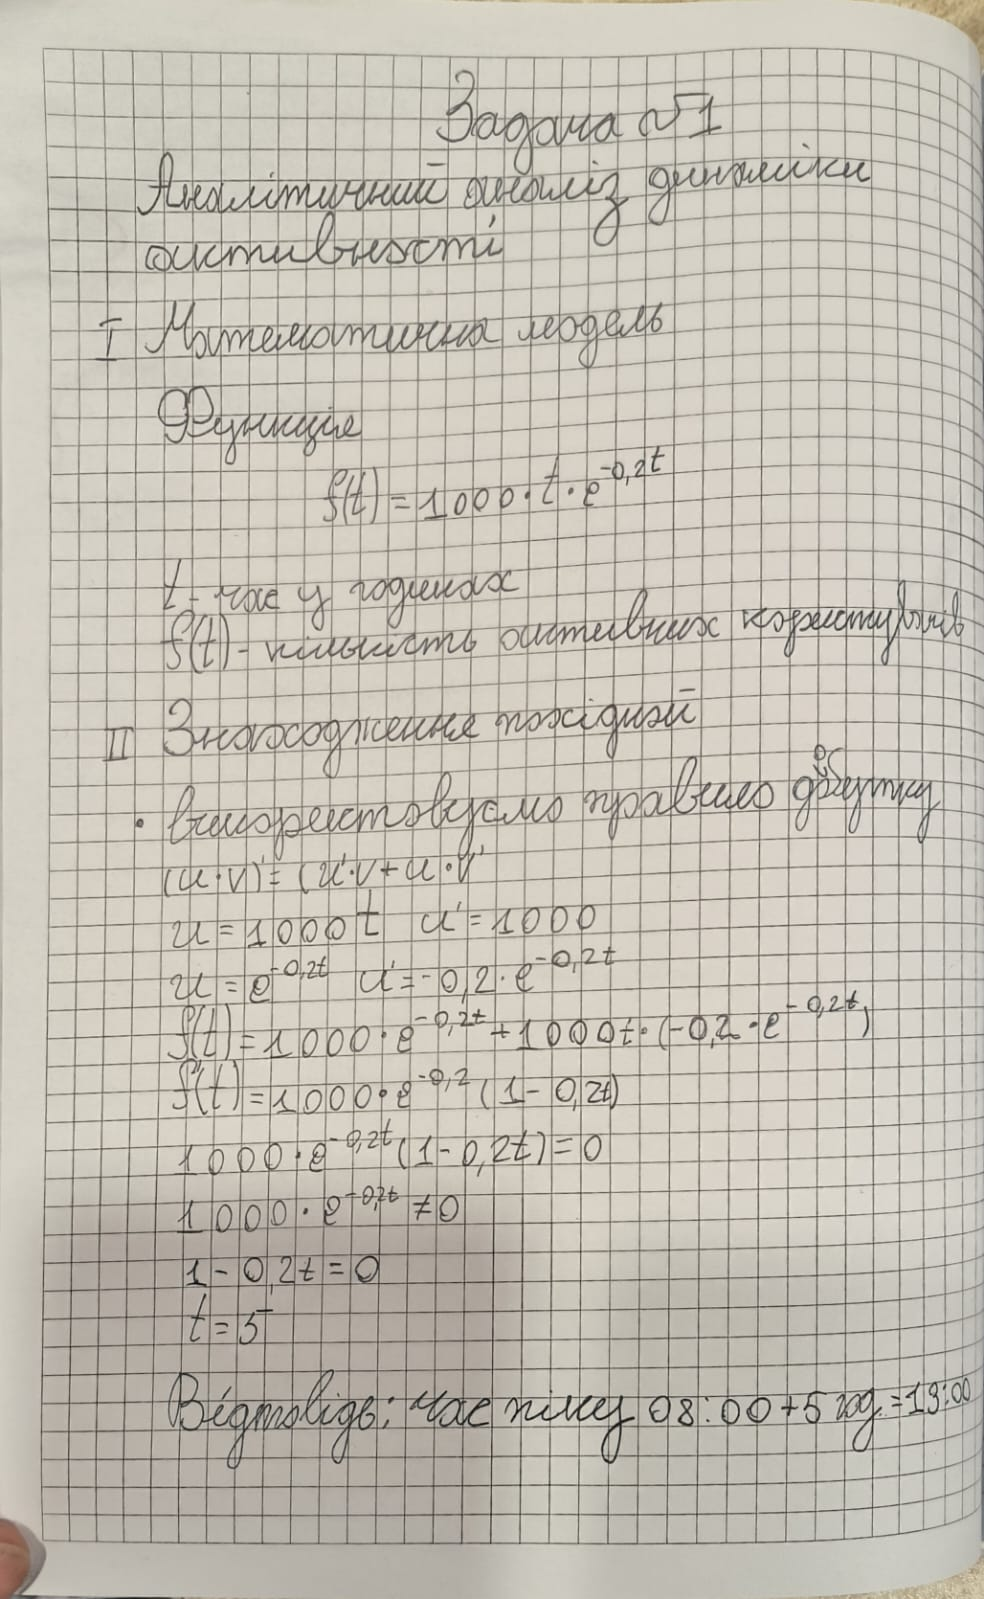

In [ ]:
# функція
def f(t):
    return 1000 * t * np.exp(-0.2 * t)

# похідна
def f_derivative(t):
    return 1000 * np.exp(-0.2 * t) * (1 - 0.2 * t)


### 1.2. Пік

f'(t) = 0
1000·e^(-0.2t)·(1 - 0.2t) = 0

1 - 0.2t = 0
t = 5 годин (це 13:00)


In [ ]:
t_max = 5
print("Пік в t =", t_max, "годин (13:00)")
print("Сесій:", f(t_max))


Пік в t = 5 годин (13:00)
Сесій: 1839.3972058572117


### 1.3. Чисельно


In [ ]:
times = [2, 6, 10]

for t in times:
    val = approx_fprime(np.array([t]), lambda x: f(x[0]), 1e-8)[0]
    print(f"t={t}: f'(t) = {val:.2f}")


t=2: f'(t) = 402.19
t=6: f'(t) = -60.24
t=10: f'(t) = -135.34


### 1.4. Порівняння


In [ ]:
for t in [2, 6, 10]:
    a = f_derivative(t)
    n = approx_fprime(np.array([t]), lambda x: f(x[0]), 1e-8)[0]
    print(f"t={t}: аналітично={a:.2f}, чисельно={n:.2f}")


t=2: аналітично=402.19, чисельно=402.19
t=6: аналітично=-60.24, чисельно=-60.24
t=10: аналітично=-135.34, чисельно=-135.34


### 1.5. Графік


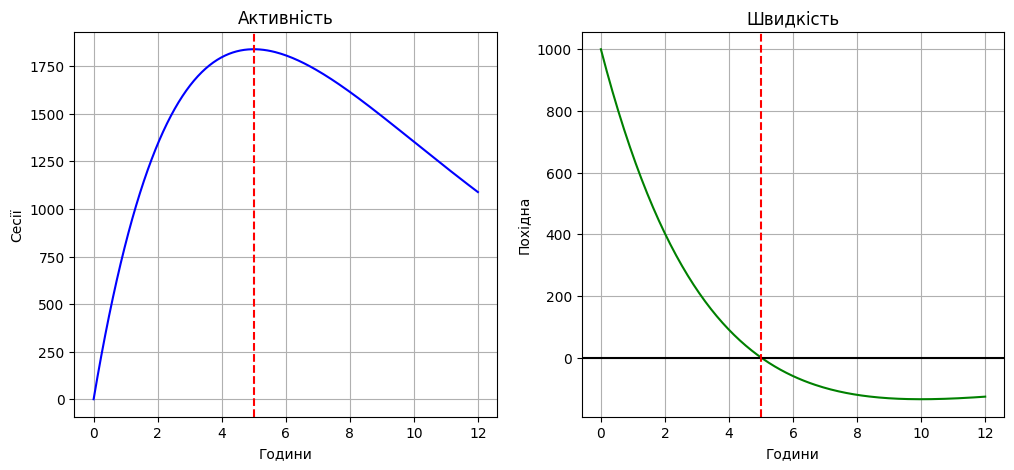

In [ ]:
t = np.linspace(0, 12, 200)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(t, f(t), 'b-')
ax1.axvline(x=5, color='r', linestyle='--')
ax1.set_xlabel('Години')
ax1.set_ylabel('Сесії')
ax1.set_title('Активність')
ax1.grid(True)

ax2.plot(t, f_derivative(t), 'g-')
ax2.axhline(y=0, color='k')
ax2.axvline(x=5, color='r', linestyle='--')
ax2.set_xlabel('Години')
ax2.set_ylabel('Похідна')
ax2.set_title('Швидкість')
ax2.grid(True)

plt.show()


### 1.6. Висновки


In [ ]:
print("О 10:00 (t=2): f'(t) =", f_derivative(2))
print("Активність ЗРОСТАЄ\n")

print("О 18:00 (t=10): f'(t) =", f_derivative(10))
print("Активність СПАДАЄ\n")

print("Максимум о 13:00, сесій:", f(5))


О 10:00 (t=2): f'(t) = 402.19202762138355
Активність ЗРОСТАЄ

О 18:00 (t=10): f'(t) = -135.3352832366127
Активність СПАДАЄ

Максимум о 13:00, сесій: 1839.3972058572117


## Задача 2. Процес навчання

dK/dt = r(M - K)

r = 0.15
M = 100
K(0) = 10


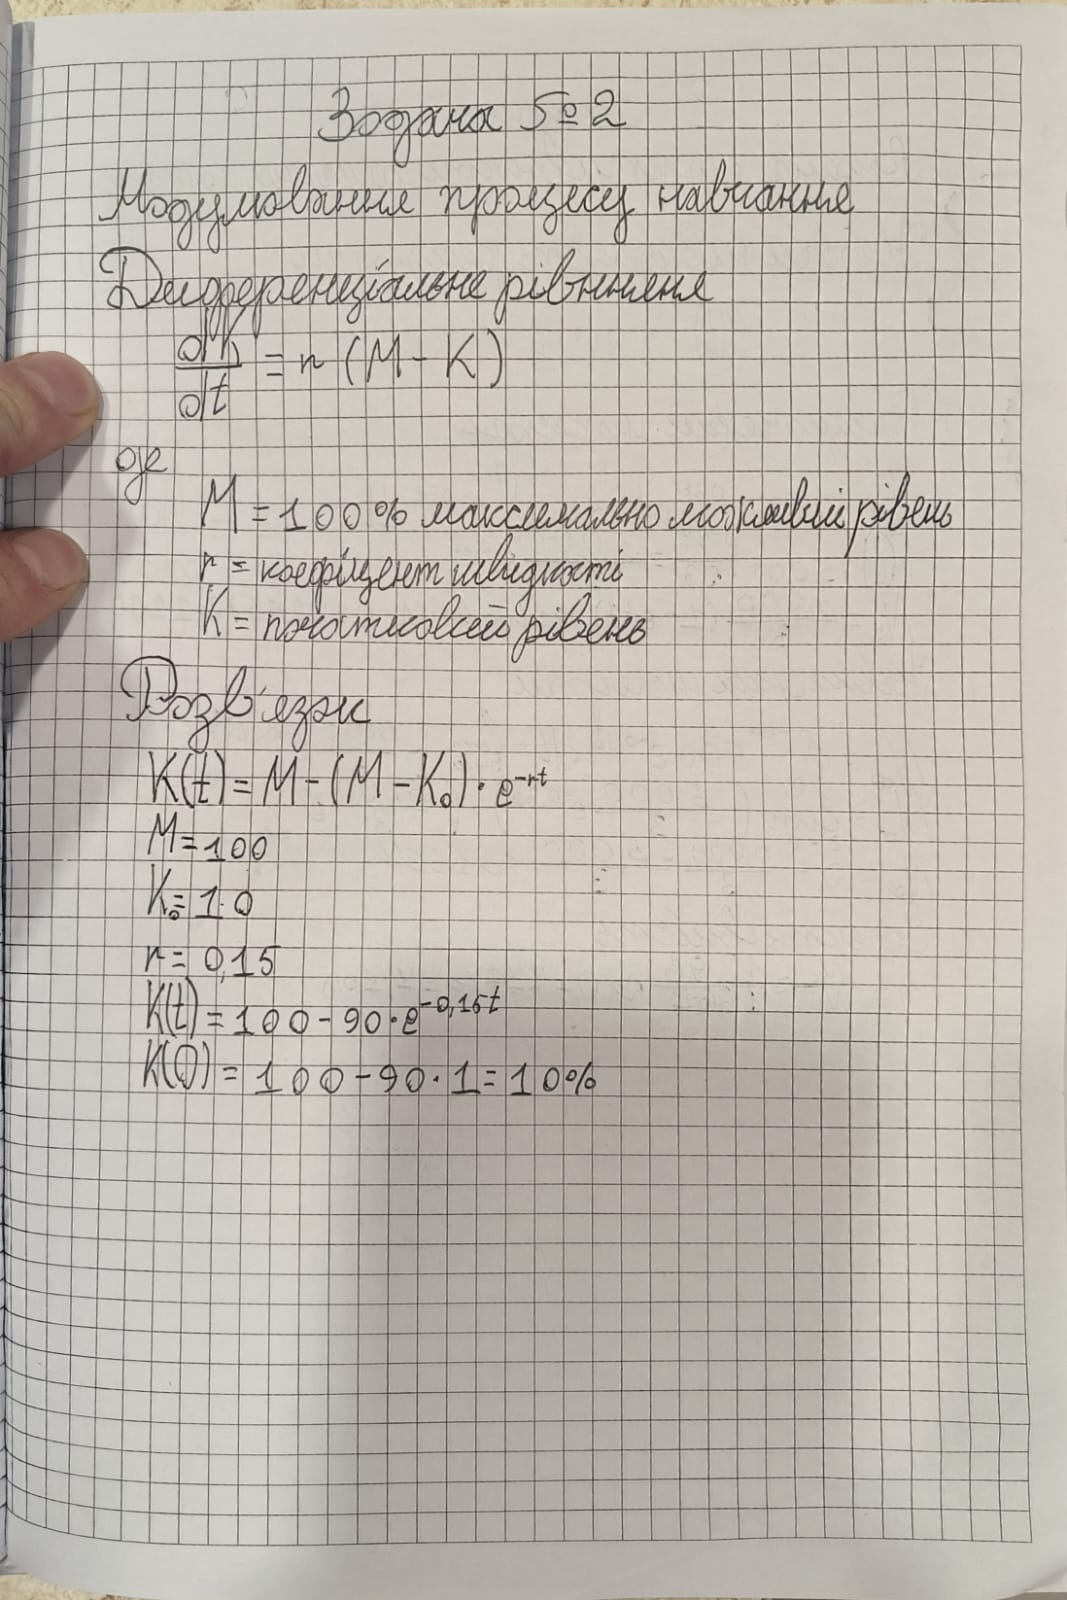

### 2.1. Функція моделі

In [ ]:
def learning_speed(t, K):
    r = 0.15
    M = 100
    return r * (M - K)


### 2.2. Розв'язок рівняння

In [ ]:
sol = solve_ivp(learning_speed, [0, 30], [10], t_eval=np.linspace(0, 30, 100))

print("День 0:", sol.y[0][0])
print("День 15:", sol.y[0][50])
print("День 30:", sol.y[0][-1])


День 0: 10.0
День 15: 90.73544179979325
День 30: 98.99208677845503


### 2.3. Порівняння студентів

In [ ]:
students = [5, 10, 20]
results = {}

for K0 in students:
    sol = solve_ivp(learning_speed, [0, 30], [K0], t_eval=np.linspace(0, 30, 100))
    results[K0] = sol

    time_90 = -np.log(10 / (100 - K0)) / 0.15

    print(f"K0={K0}%: досягне 90% за {time_90:.1f} днів")


K0=5%: досягне 90% за 15.0 днів
K0=10%: досягне 90% за 14.6 днів
K0=20%: досягне 90% за 13.9 днів


### 2.4. Графік

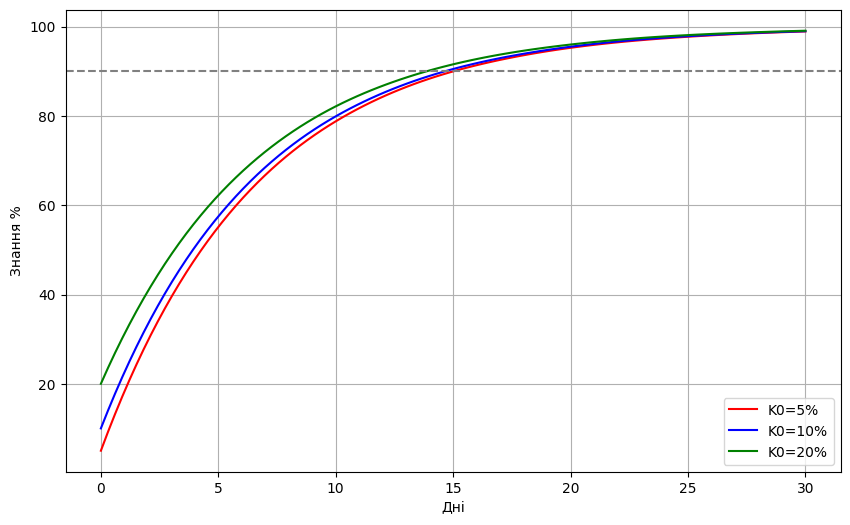

In [ ]:
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green']
for i, K0 in enumerate(students):
    sol = results[K0]
    plt.plot(sol.t, sol.y[0], color=colors[i], label=f'K0={K0}%')

plt.axhline(y=90, color='gray', linestyle='--')
plt.xlabel('Дні')
plt.ylabel('Знання %')
plt.legend()
plt.grid(True)
plt.show()


## Задача 3. Реєстрації



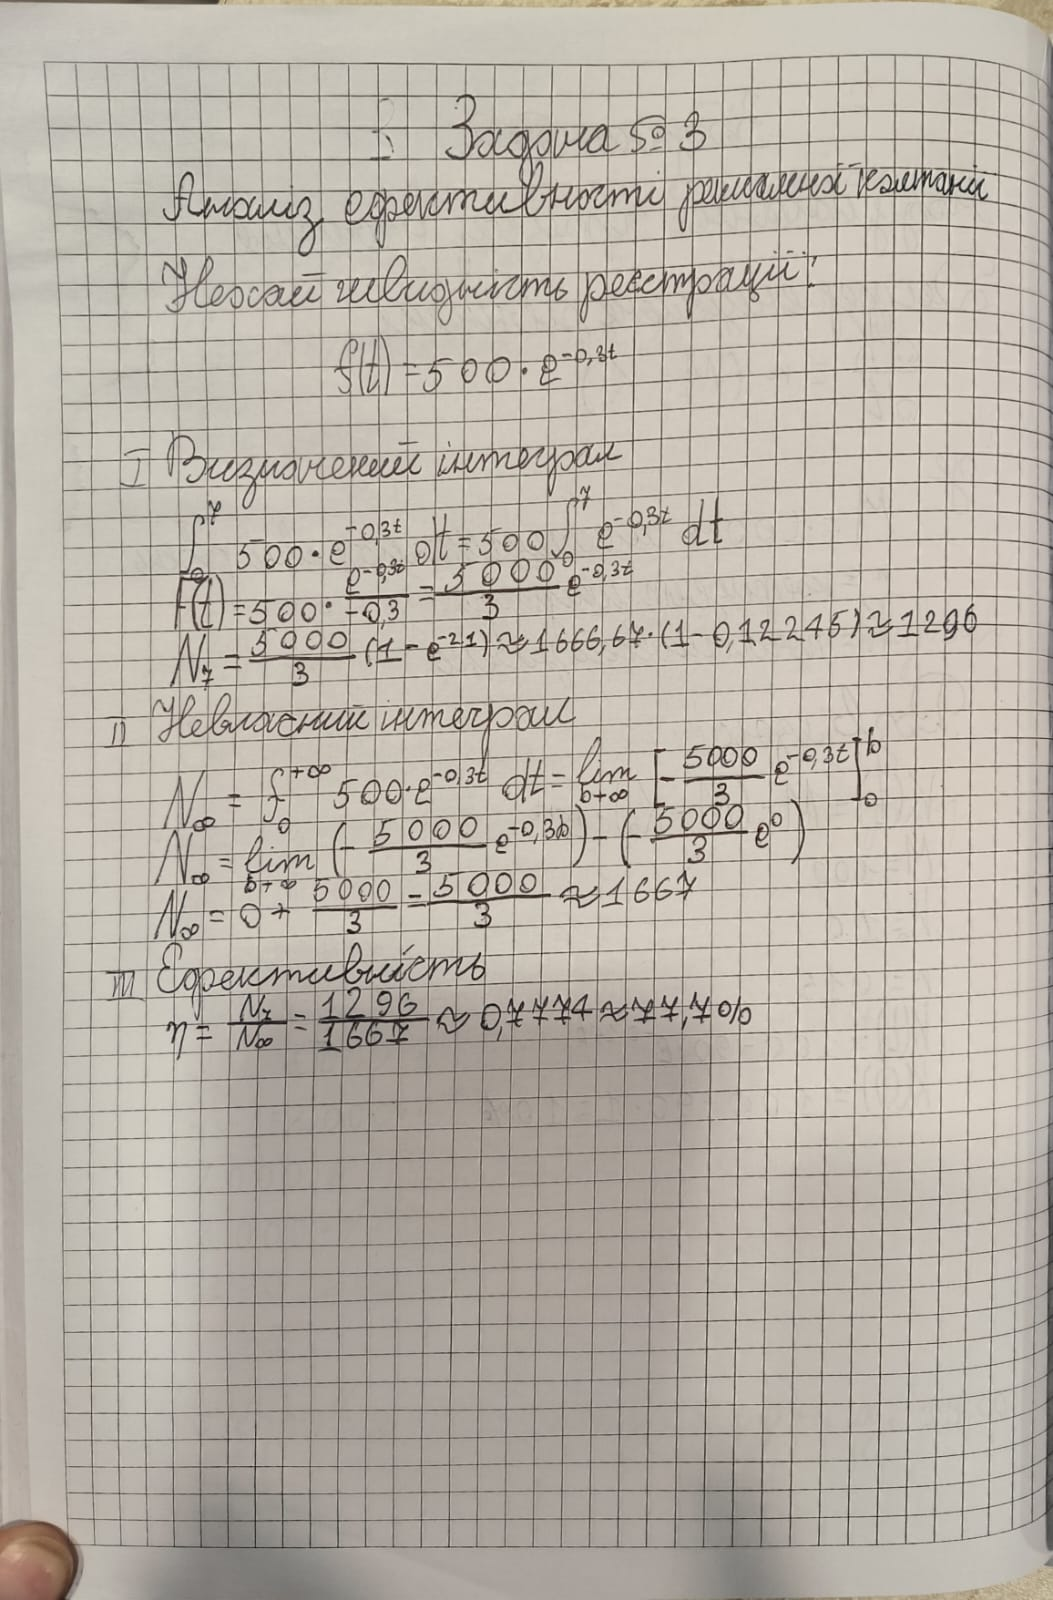

In [ ]:
def registrations(t):
    return 500 * np.exp(-0.3 * t)

N7 = (5000/3) * (1 - np.exp(-2.1))
print(f"За 7 днів: {N7:.2f}")


За 7 днів: 1462.57


### 3.2. Перевірка чисельно

In [ ]:
N7_num, err = quad(registrations, 0, 7)

print(f"Чисельно: {N7_num:.2f}")
print(f"Аналітично: {N7:.2f}")


Чисельно: 1462.57
Аналітично: 1462.57


### 3.3. Максимум

∫₀^∞ 500·e^(-0.3t) dt

N∞ = 5000/3


In [ ]:
N_max = 5000/3
N_max_num, _ = quad(registrations, 0, np.inf)

print(f"Максимум: {N_max:.2f}")
print(f"Перевірка: {N_max_num:.2f}")


Максимум: 1666.67
Перевірка: 1666.67


### 3.4. Ефективність

In [ ]:
eff = (N7 / N_max) * 100

print(f"Ефективність: {eff:.1f}%")


Ефективність: 87.8%


### 3.5. Графік

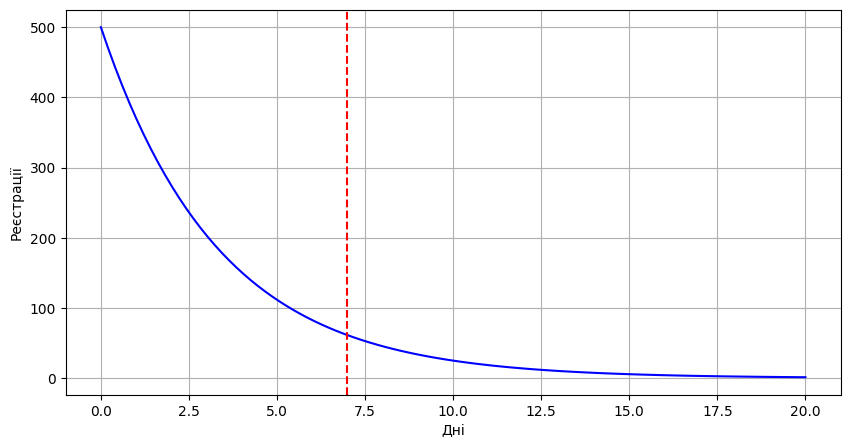

In [ ]:
days = np.linspace(0, 20, 100)

plt.figure(figsize=(10, 5))
plt.plot(days, registrations(days), 'b-')
plt.axvline(x=7, color='r', linestyle='--')
plt.xlabel('Дні')
plt.ylabel('Реєстрації')
plt.grid(True)
plt.show()


## Задача 4. Функція двох змінних


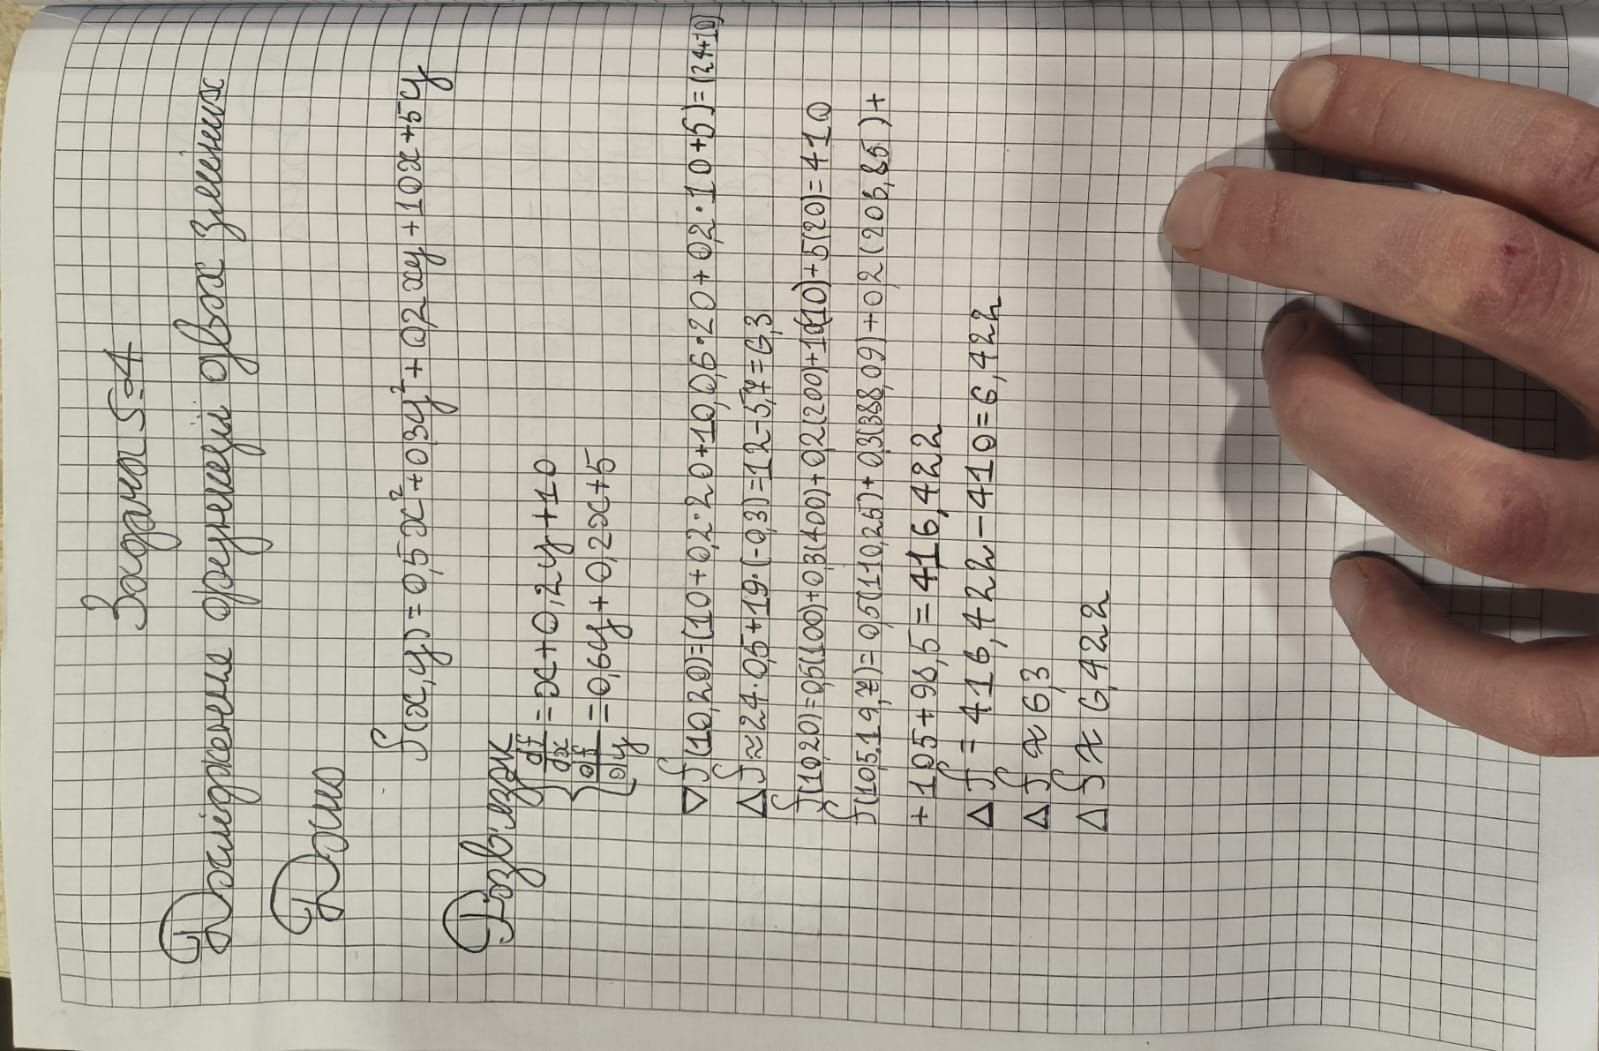**Рукописний розв'язок:**

<!-- Вставити фото тут: перетягни зображення або вставь посилання -->
<!-- ![Розв'язок задачі 4](посилання_на_фото.jpg) -->

In [ ]:
def func(x, y):
    return 0.5*x**2 + 0.3*y**2 + 0.2*x*y + 10*x + 5*y

def df_x(x, y):
    return x + 0.2*y + 10

def df_y(x, y):
    return 0.6*y + 0.2*x + 5


### 4.2. Градієнт у точці (10, 20)

In [ ]:
point = np.array([10.0, 20.0])

grad = approx_fprime(point, lambda p: func(p[0], p[1]), 1e-8)

print(f"Градієнт: ({grad[0]:.2f}, {grad[1]:.2f})")


Градієнт: (24.00, 19.00)


### 4.3. Порівняння

In [ ]:
gx = df_x(10, 20)
gy = df_y(10, 20)

print(f"∂f/∂x: аналітично={gx}, чисельно={grad[0]:.2f}")
print(f"∂f/∂y: аналітично={gy}, чисельно={grad[1]:.2f}")


∂f/∂x: аналітично=24.0, чисельно=24.00
∂f/∂y: аналітично=19.0, чисельно=19.00


### 4.4. Апроксимація

Δf ≈ (∂f/∂x)·Δx + (∂f/∂y)·Δy


In [ ]:
dx = 0.5
dy = -0.3

df_approx = gx * dx + gy * dy

x0, y0 = 10, 20
x1, y1 = x0 + dx, y0 + dy
df_exact = func(x1, y1) - func(x0, y0)

print(f"Δf наближено: {df_approx:.2f}")
print(f"Δf точно: {df_exact:.2f}")


Δf наближено: 6.30
Δf точно: 6.42


### 4.5. Графік

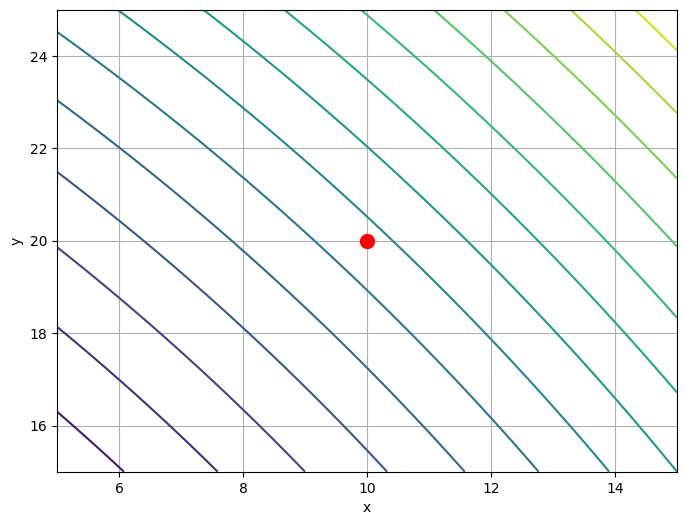

In [ ]:
x = np.linspace(5, 15, 50)
y = np.linspace(15, 25, 50)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=15)
plt.plot(10, 20, 'ro', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
